In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## EDA

In [2]:
df = pd.read_csv("./data/Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape

(13611, 17)

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
obj_cols = [i for i in df.columns if df[i].dtype == 'O']
for i in obj_cols:
    print((i + ":"),df[i].unique())

df['Class'].value_counts()

Class: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

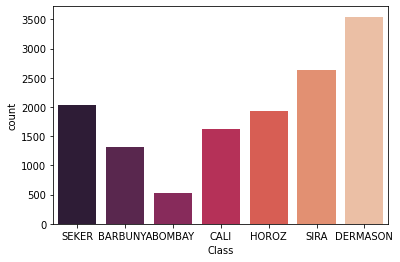

In [6]:
sns.countplot(x = df["Class"], data = df, palette='rocket')

<AxesSubplot:>

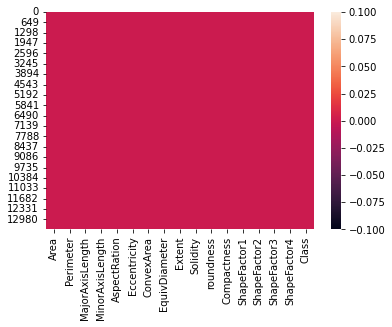

In [7]:
sns.heatmap(df.isna())

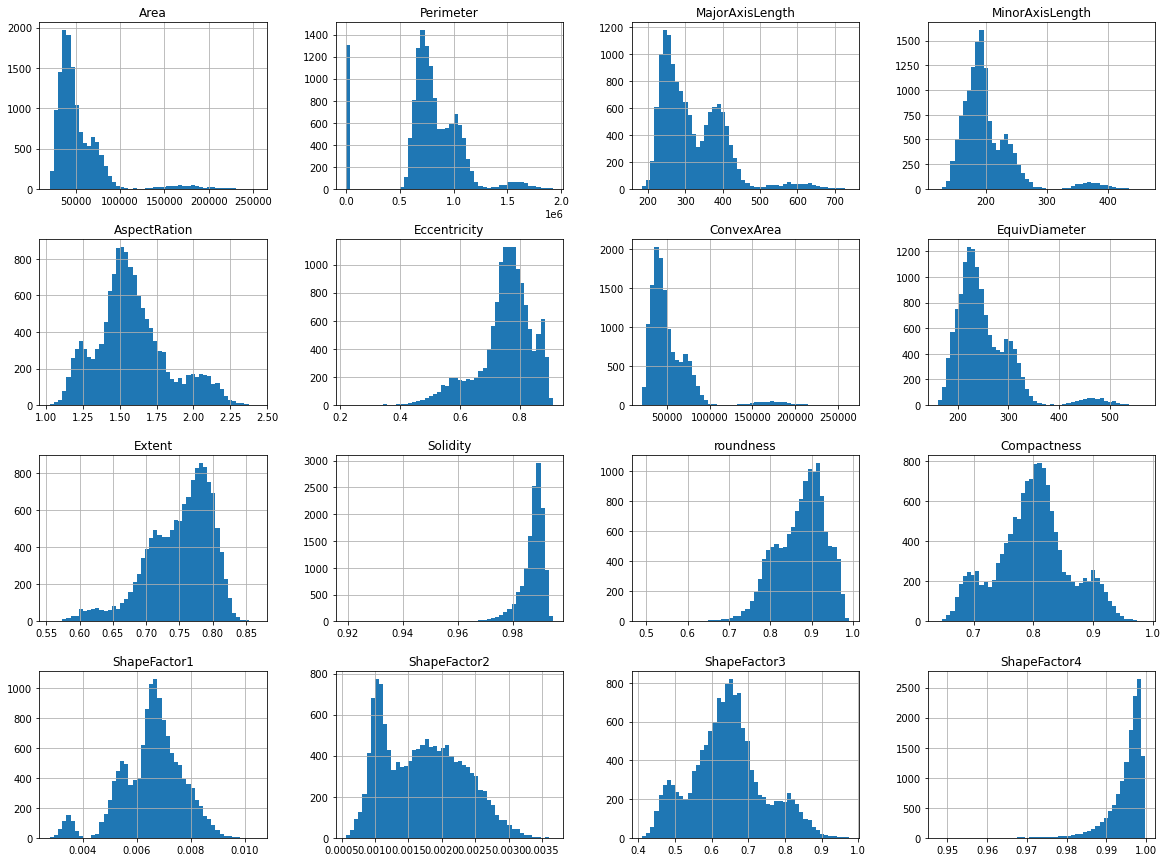

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

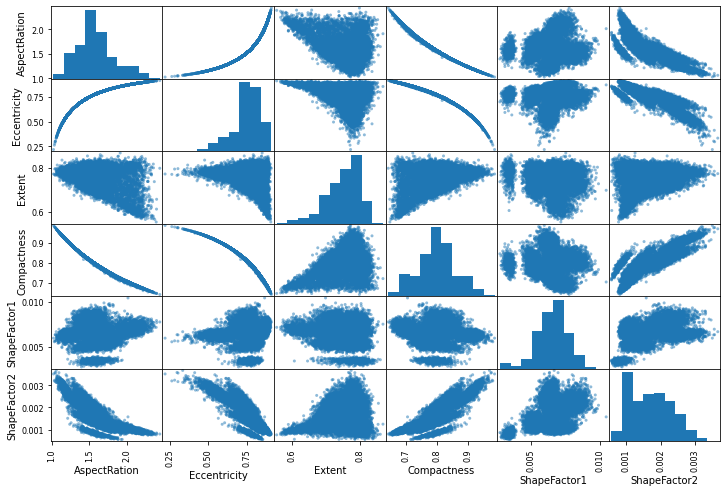

In [9]:
from pandas.plotting import scatter_matrix

# Array of features
features = ['AspectRation', 'Eccentricity', 'Extent', 'Compactness', 'ShapeFactor1', 'ShapeFactor2']

# Plot scatter matrix
scatter_matrix(df[features], figsize=(12, 8));

<AxesSubplot:>

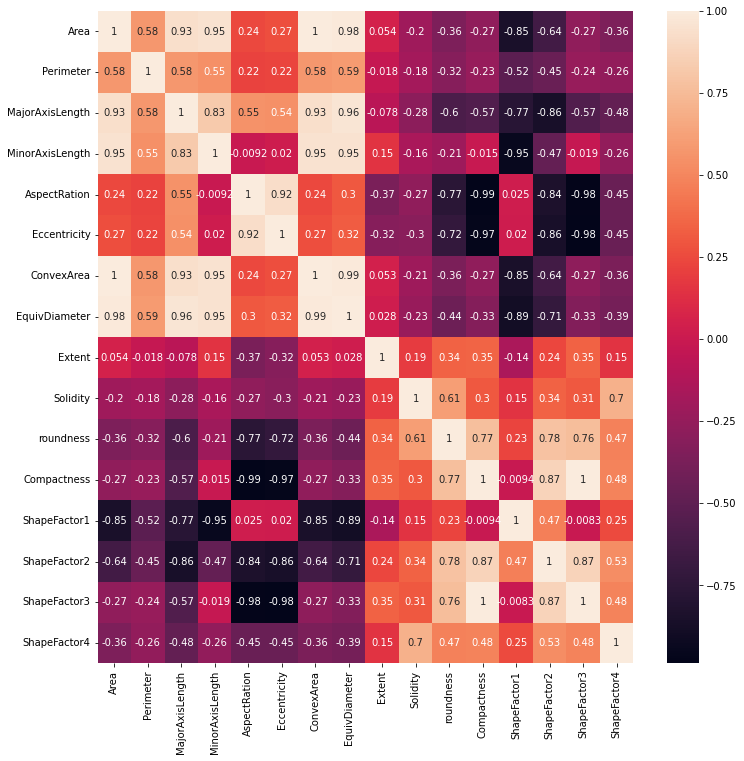

In [10]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(),annot=True)

## Split data

In [11]:
X = df.drop('Class', axis=1)
y = df.Class.values

In [12]:
np.random.seed(42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
print('There are {} instances in the training set.'.format(len(y_train)))
print('There are {} instances in the test set.'.format(len(y_test)))

There are 10888 instances in the training set.
There are 2723 instances in the test set.


## Scale data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_train_scaled

array([[-0.82004684, -0.41496395, -0.9916898 , ...,  0.87409641,
         0.26508427,  0.34316281],
       [-0.50936012, -0.04773017, -0.56941112, ...,  0.32551494,
         0.16383972,  0.04702778],
       [-0.7548078 , -0.36807121, -1.04911073, ...,  1.38029879,
         1.01678554,  0.34322861],
       ...,
       [ 1.27973353,  1.19277046,  1.60855361, ..., -1.3015929 ,
        -0.95796902, -0.24362728],
       [-0.49781492, -0.1830065 , -0.85527186, ...,  1.41306453,
         1.61953833,  0.85939177],
       [ 0.37072934, -2.3784256 ,  0.9513581 , ..., -1.22706772,
        -1.41055324, -1.00995094]])

In [16]:
X_test_scaled = scaler.transform(X_test)

## Investigate PCA & LDA Decomposition

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_train_scaled)
principalDf = pd.DataFrame(data = principalComponents[:,:2]
             , columns = ['principal component 1', 'principal component 2'])

Text(0, 0.5, 'cumulative explained variance')

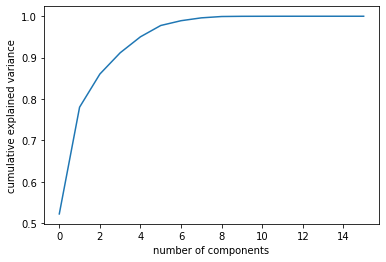

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [20]:
PCAfinalDf = pd.concat([principalDf, pd.DataFrame(y_train,columns=['Class'])], axis = 1)

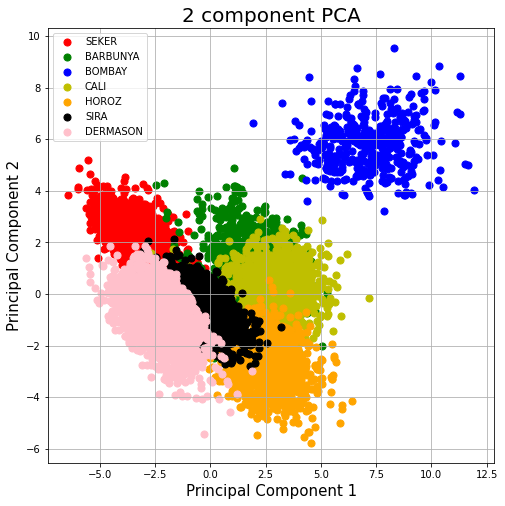

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df['Class'].unique()
colors = ['r', 'g','b','y','orange','black','pink']
for target, color in zip(targets,colors):
    indicesToKeep = PCAfinalDf['Class'] == target
    ax.scatter(PCAfinalDf.loc[indicesToKeep, 'principal component 1']
               , PCAfinalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X_train_scaled,y_train).transform(X_train_scaled)

Text(0, 0.5, 'cumulative explained variance')

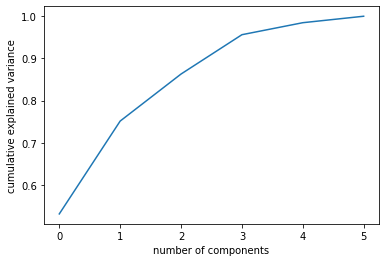

In [23]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

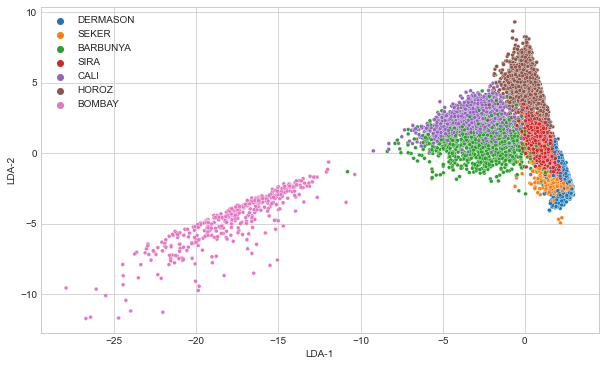

In [25]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], s = 15,
             hue=y_train)
plt.xlabel('LDA-1') , plt.ylabel('LDA-2')
plt.show()

## Search a number of ML models

In [26]:
from model_search import best_model

In [31]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [32]:
list_algo = [SVC,SGDClassifier]

list_of_accuracy = []
list_of_score = []

for i in list_algo:
    accuracyscore, trainingscore = best_model(X_train_scaled, y_train, X_test_scaled, y_test, i)
    list_of_accuracy.append(accuracyscore)
    list_of_score.append(trainingscore)

Training Score: 0.9317597354886114
Accuracy Score: 0.932427469702534
Confusion Matrix: [[239   0  15   0   0   1   6]
 [  0 117   0   0   0   0   0]
 [ 11   0 300   0   4   1   1]
 [  0   0   0 620   0   6  45]
 [  2   0   5   4 390   0   7]
 [  3   0   0   9   0 393   8]
 [  1   0   0  46   5   4 480]]
Classification Report:               precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       317
    DERMASON       0.91      0.92      0.92       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Training Score: 0.9157788390889052
Accuracy Score: 0.9181050312155711
Confu

In [33]:
pca = PCA(8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [34]:
list_algo = [SVC,SGDClassifier]

list_of_accuracy = []
list_of_score = []

for i in list_algo:
    accuracyscore, trainingscore = best_model(X_train_pca, y_train, X_test_pca, y_test, i)
    list_of_accuracy.append(accuracyscore)
    list_of_score.append(trainingscore)

Training Score: 0.9319434239529758
Accuracy Score: 0.932427469702534
Confusion Matrix: [[238   0  15   0   0   2   6]
 [  0 117   0   0   0   0   0]
 [ 11   0 300   0   4   1   1]
 [  0   0   0 621   0   6  44]
 [  2   0   6   4 390   0   6]
 [  3   0   0   9   0 393   8]
 [  1   0   0  46   5   4 480]]
Classification Report:               precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.95      0.94       317
    DERMASON       0.91      0.93      0.92       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Training Score: 0.910268185157972
Accuracy Score: 0.9118619170033052
Confus

## Hyperparameter tuning

In [35]:
params_grid_svc = [{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1], 'C': [1, 100, 1000]}]

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create SVC object
svc_model = SVC()

# Run GridSearchCV with grid of parameters, 5 folds
grid_search_svc = GridSearchCV(svc_model, params_grid_svc, cv=5)
grid_search_svc.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 100, 1000], 'gamma': [0.001, 0.01, 0.1],
                          'kernel': ['rbf']}])

In [36]:
grid_search_svc.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [37]:
# Get the final model
final_svc = grid_search_svc.best_estimator_

# Use the final model to make predictions on the scaled test set
y_pred_svc = final_svc.predict(X_test_scaled)

In [38]:
# Cross-validation with three folds, measuring accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(final_svc, X_test_scaled, y_test, cv=3, scoring="accuracy")

array([0.92290749, 0.9185022 , 0.93054024])

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


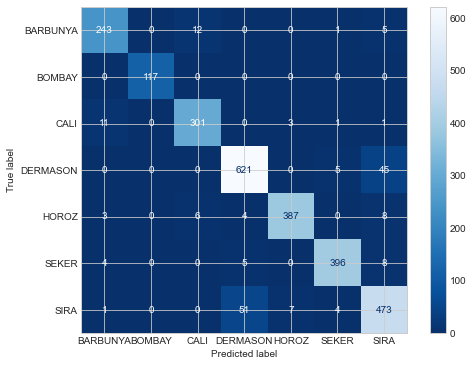

In [40]:
from sklearn.metrics import plot_confusion_matrix

# Define figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot confusion matrix
plot_confusion_matrix(final_svc, X_test_scaled, y_test,
 cmap="Blues_r",
 ax=ax);